# Aula 3 - Python

Nesta aula veremos:

1.Numpy arrays e pandas Dataframes

2.Open and export files

3.Conditional Statements

4.Loops em Python

5.Functions - def


## 1.1 Numpy arrays


In [1]:
import numpy as np

# Criando um vetor de dados aleatórios
data = np.random.rand(1000,2)

# Verificando o tamanho do vetor
print(data.shape)
print(np.size(data))

# Print de uma amostra dos dados
print(data[0:10])
print(data[0:10].shape)

(1000, 2)
2000
[[0.53260309 0.96761725]
 [0.25215187 0.93373192]
 [0.15039607 0.38792499]
 [0.52448509 0.38677296]
 [0.08988214 0.18519294]
 [0.22950891 0.8076164 ]
 [0.82049079 0.73931883]
 [0.09532565 0.17706917]
 [0.51757033 0.47642986]
 [0.18868859 0.94452791]]
(10, 2)


In [2]:
# Usando Monte-Carlo
dataMax = 1000
dataMin = 10
data = (dataMax - dataMin)*data + dataMin
print(data[0:10])

[[537.27705551 967.94107666]
 [259.63035431 934.39459695]
 [158.89210812 394.04573896]
 [529.24023663 392.90522634]
 [ 98.98331975 193.34101299]
 [237.2138238  809.54023293]
 [822.2858812  741.9256421 ]
 [104.372396   185.29847699]
 [522.39462403 481.66555792]
 [196.80169942 945.08263424]]


<class 'numpy.ndarray'>


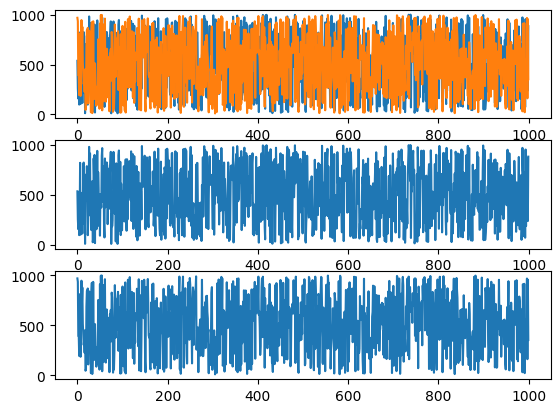

In [4]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(3)
ax[0].plot(data)
ax[1].plot(data[:,0])
ax[2].plot(data[:,1])
print(type(data))

In [5]:
# Criando um dado 2D 
data3d = np.sin(np.random.rand(1000,1000))
print(data3d)

[[0.61093157 0.43860603 0.26224505 ... 0.60464548 0.67877955 0.08964812]
 [0.61472373 0.4670026  0.49232781 ... 0.42124821 0.14752831 0.64508737]
 [0.5030776  0.35911921 0.48989534 ... 0.82666634 0.42401658 0.19924121]
 ...
 [0.52655666 0.30690191 0.37775884 ... 0.71269792 0.69554358 0.13973113]
 [0.79711451 0.67665739 0.37724631 ... 0.67954831 0.76709705 0.64461642]
 [0.09353097 0.82875418 0.57199382 ... 0.14980472 0.38807622 0.78583315]]


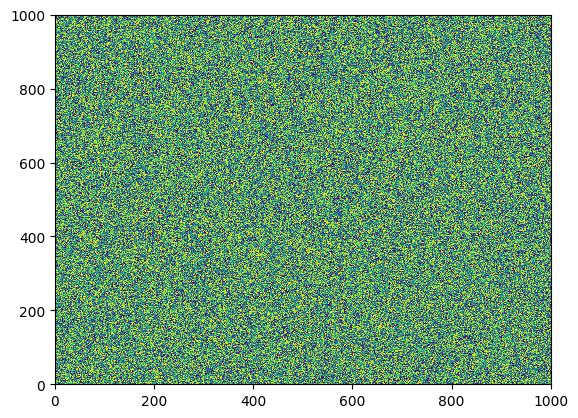

In [6]:
# Plotando um dado 3D
fig2, ax2 = plt.subplots()
ax2.pcolor(data3d)

In [7]:
# Criando vertor temporal
dtime = np.arange(np.datetime64("2022-01-01"), np.datetime64("2023-01-01"), np.timedelta64(1, "h"))
print(dtime[1:10])
print(dtime.shape)
print(type(dtime))

['2022-01-01T01' '2022-01-01T02' '2022-01-01T03' '2022-01-01T04'
 '2022-01-01T05' '2022-01-01T06' '2022-01-01T07' '2022-01-01T08'
 '2022-01-01T09']
(8760,)
<class 'numpy.ndarray'>


# PANDAS

In [8]:
import pandas as pd

# Criando um dataframe
df = pd.DataFrame()

In [9]:
# Monstrando um dataframe
df['datetime'] = dtime

In [10]:
# Criando uma coluna random dentro do dataframe df
df['random'] = np.random.rand(df.shape[0])

In [11]:
df['random'][1:10]

1    0.656128
2    0.916388
3    0.000738
4    0.026598
5    0.744427
6    0.213912
7    0.426607
8    0.677877
9    0.811864
Name: random, dtype: float64

In [12]:
# Indexação
df.iloc[:,0]

0      2022-01-01 00:00:00
1      2022-01-01 01:00:00
2      2022-01-01 02:00:00
3      2022-01-01 03:00:00
4      2022-01-01 04:00:00
               ...        
8755   2022-12-31 19:00:00
8756   2022-12-31 20:00:00
8757   2022-12-31 21:00:00
8758   2022-12-31 22:00:00
8759   2022-12-31 23:00:00
Name: datetime, Length: 8760, dtype: datetime64[s]

In [13]:
# Colocando o datetime como index
df = df.set_index(df['datetime'])
df

,datetime,random
datetime,,
2022-01-01 00:00:00,2022-01-01 00:00:00,0.306931
2022-01-01 01:00:00,2022-01-01 01:00:00,0.656128
2022-01-01 02:00:00,2022-01-01 02:00:00,0.916388
2022-01-01 03:00:00,2022-01-01 03:00:00,0.000738
2022-01-01 04:00:00,2022-01-01 04:00:00,0.026598
...,...,...
2022-12-31 19:00:00,2022-12-31 19:00:00,0.572452
2022-12-31 20:00:00,2022-12-31 20:00:00,0.401686
2022-12-31 21:00:00,2022-12-31 21:00:00,0.825165


In [14]:
# Criando colunas com ano, mês e dia
df['year'] = df.index.year
df['month'] = df.index.month
df['day'] = df.index.day

(8760,)


<Axes: xlabel='datetime'>

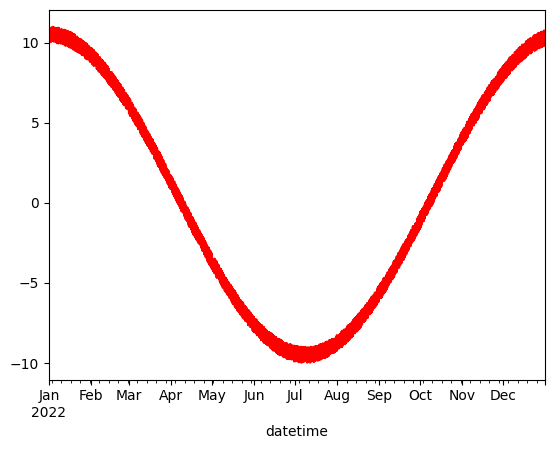

In [15]:
tt = np.arange(0,df.shape[0],1)
print(tt.shape)
df['sazonal'] = (np.cos(tt/(360*4)))
df['timeSeries'] = 10*df['sazonal']+df['random']
#df['sazonal'].plot()
df['timeSeries'].plot(color='red')

In [16]:
df

,datetime,random,year,month,day,sazonal,timeSeries
datetime,,,,,,,
2022-01-01 00:00:00,2022-01-01 00:00:00,0.306931,2022,1,1,1.000000,10.306931
2022-01-01 01:00:00,2022-01-01 01:00:00,0.656128,2022,1,1,1.000000,10.656126
2022-01-01 02:00:00,2022-01-01 02:00:00,0.916388,2022,1,1,0.999999,10.916379
2022-01-01 03:00:00,2022-01-01 03:00:00,0.000738,2022,1,1,0.999998,10.000716
2022-01-01 04:00:00,2022-01-01 04:00:00,0.026598,2022,1,1,0.999996,10.026559
...,...,...,...,...,...,...,...
2022-12-31 19:00:00,2022-12-31 19:00:00,0.572452,2022,12,31,0.979401,10.366459
2022-12-31 20:00:00,2022-12-31 20:00:00,0.401686,2022,12,31,0.979541,10.197093
2022-12-31 21:00:00,2022-12-31 21:00:00,0.825165,2022,12,31,0.979680,10.621968


In [18]:
# Salvar meu dataframe

df.to_csv(r'C:\Users\mikae\OneDrive\Documentos\Controle poluição\GitHub\ENS5173_20241\dados.csv')

In [19]:
# Criando uma função
def noiseCreation(path, year):
    """Esta função cria um ruido com sazonalidade.
    Inputs:
        path = asdasdas
        year = asdasdasdas

    Criado por Leonardo
    """
    
    # Criando um dataframe
    df = pd.DataFrame()
    
    # Criando vertor temporal
    dtime = np.arange(np.datetime64(str(year)+"-01-01"), np.datetime64(str(year+1)+"-01-01"), np.timedelta64(1, "h"))
    
    # Monstrando um dataframe
    df['datetime'] = dtime
        
    # Datetime como index do dataframe
    df = df.set_index(df['datetime'])
    
    # Criando colunas com ano, mês e dia
    df['year'] = df.index.year
    df['month'] = df.index.month
    df['day'] = df.index.day
    
    # Crio uma coluna random
    df['random'] = np.random.rand(df.shape[0])
    
    # Adicionar sazonalidade
    tt = np.arange(0,df.shape[0],1)
    print(tt.shape)
    df['sazonal'] = (np.cos(tt/(360*4)))
    df['timeSeries'] = 10*df['sazonal']+df['random']
    #df['sazonal'].plot()
    df['timeSeries'].plot(color='red')
    df.to_csv(path+'/noise_'+str(year)+'.csv')
    
    return df

(8760,)


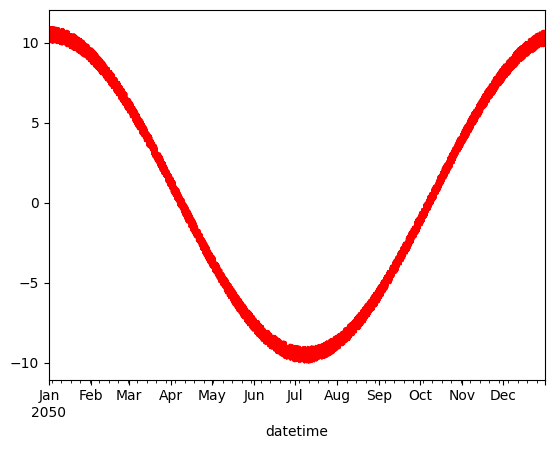

In [22]:
path = 'C:/Users/mikae/OneDrive/Documentos/Controle poluição/GitHub/ENS5173_20241/dados'
df2 = noiseCreation(path,2050)

2002
(8760,)
2003
(8760,)
2004
(8784,)
2005
(8760,)
2006
(8760,)
2007
(8760,)
2008
(8784,)
2009
(8760,)


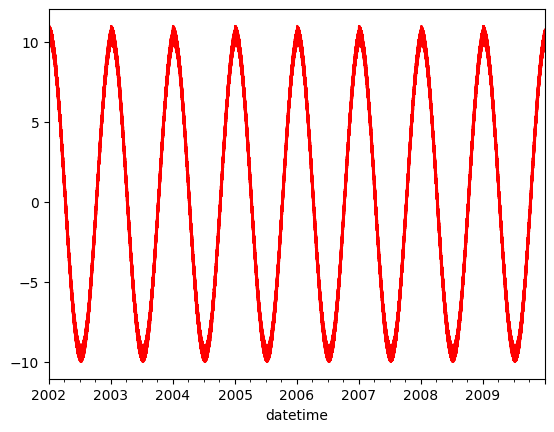

In [23]:
# Primeira opção de loop
for ii in range(2002,2010):
    print(ii)
    df = noiseCreation(path,ii)

In [24]:
df

,datetime,year,month,day,random,sazonal,timeSeries
datetime,,,,,,,
2009-01-01 00:00:00,2009-01-01 00:00:00,2009,1,1,0.167809,1.000000,10.167809
2009-01-01 01:00:00,2009-01-01 01:00:00,2009,1,1,0.902032,1.000000,10.902029
2009-01-01 02:00:00,2009-01-01 02:00:00,2009,1,1,0.868139,0.999999,10.868130
2009-01-01 03:00:00,2009-01-01 03:00:00,2009,1,1,0.560117,0.999998,10.560095
2009-01-01 04:00:00,2009-01-01 04:00:00,2009,1,1,0.490591,0.999996,10.490552
...,...,...,...,...,...,...,...
2009-12-31 19:00:00,2009-12-31 19:00:00,2009,12,31,0.394371,0.979401,10.188378
2009-12-31 20:00:00,2009-12-31 20:00:00,2009,12,31,0.148031,0.979541,9.943438
2009-12-31 21:00:00,2009-12-31 21:00:00,2009,12,31,0.458821,0.979680,10.255624


2001
2030
2032
(8784,)
2053
(8760,)
2060
(8784,)


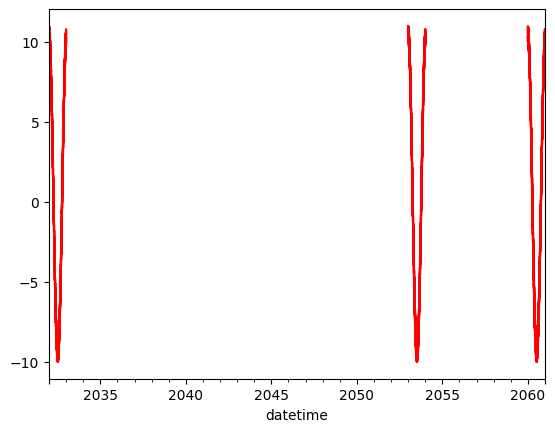

In [25]:
anos = [2001,2030,2032,2053,2060]

for ano in anos:
    print(ano)
    if ano > 2030:
        df = noiseCreation(path,ano)

In [27]:
import os
files = os.listdir(path)
print(files)

allData = []
for file in files:
    if file.endswith('.csv'):
        print(file)
        data = pd.read_csv(path+'/'+file)
        allData.append(data)

['noise_2002.csv', 'noise_2003.csv', 'noise_2004.csv', 'noise_2005.csv', 'noise_2006.csv', 'noise_2007.csv', 'noise_2008.csv', 'noise_2009.csv', 'noise_2032.csv', 'noise_2050.csv', 'noise_2053.csv', 'noise_2060.csv']
noise_2002.csv
noise_2003.csv
noise_2004.csv
noise_2005.csv
noise_2006.csv
noise_2007.csv
noise_2008.csv
noise_2009.csv
noise_2032.csv
noise_2050.csv
noise_2053.csv
noise_2060.csv


In [28]:

allDataDf = pd.concat(allData)

In [29]:

allDataDf

,datetime,datetime.1,year,month,day,random,sazonal,timeSeries
0,2002-01-01 00:00:00,2002-01-01 00:00:00,2002,1,1,0.777523,1.000000,10.777523
1,2002-01-01 01:00:00,2002-01-01 01:00:00,2002,1,1,0.815070,1.000000,10.815067
2,2002-01-01 02:00:00,2002-01-01 02:00:00,2002,1,1,0.004495,0.999999,10.004485
3,2002-01-01 03:00:00,2002-01-01 03:00:00,2002,1,1,0.253364,0.999998,10.253342
4,2002-01-01 04:00:00,2002-01-01 04:00:00,2002,1,1,0.909366,0.999996,10.909328
...,...,...,...,...,...,...,...,...
8779,2060-12-31 19:00:00,2060-12-31 19:00:00,2060,12,31,0.741325,0.982630,10.567625
8780,2060-12-31 20:00:00,2060-12-31 20:00:00,2060,12,31,0.208514,0.982759,10.036100
8781,2060-12-31 21:00:00,2060-12-31 21:00:00,2060,12,31,0.981240,0.982887,10.810108
8782,2060-12-31 22:00:00,2060-12-31 22:00:00,2060,12,31,0.362556,0.983014,10.192701


In [ ]:
plt.plot(allDataDf['datetime'],allDataDf['timeSeries'])